Importowanie

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import KernelPCA

**Punkt 3.1 z przytoczonego artykułu - Pattern Classification for Synthetic Data**

Funkcja pomocnicza służąca do przygotowywania danych do wygenerowania sfery .

In [ ]:
def generate_data_sphere(radius, num_samples, noise):
  theta = np.random.uniform(0, np.pi, num_samples)
  phi = np.random.uniform(0, 2*np.pi, num_samples)

  x = radius * np.sin(phi) * np.cos(theta)
  y = radius * np.sin(phi) * np.sin(theta)
  z = radius * np.cos(phi)

  x += np.random.normal(0, noise, num_samples)
  y += np.random.normal(0, noise, num_samples)
  z += np.random.normal(0, noise, num_samples)

  return np.array([x, y, z]).T

Rysowanie sfer

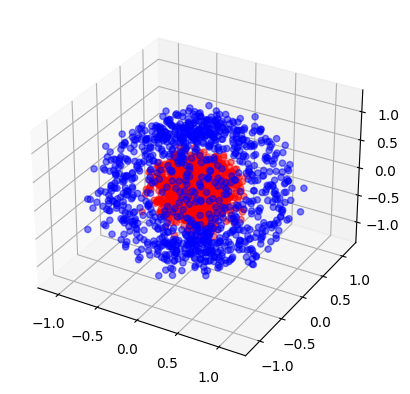

In [ ]:
num_samples = 1000
inner_radius = 0.4
outer_radius = 1
sigma_noise = 0.1

inner_sphere = generate_data_sphere(radius=inner_radius, num_samples=num_samples, noise=sigma_noise)
outer_sphere = generate_data_sphere(radius=outer_radius, num_samples=num_samples, noise=sigma_noise)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inner_sphere[:, 0], inner_sphere[:, 1], inner_sphere[:, 2], c='r', marker='o', alpha=0.5)
ax.scatter(outer_sphere[:, 0], outer_sphere[:, 1], outer_sphere[:, 2], c='b', marker='o', alpha=0.5)

**Jądro RBF**

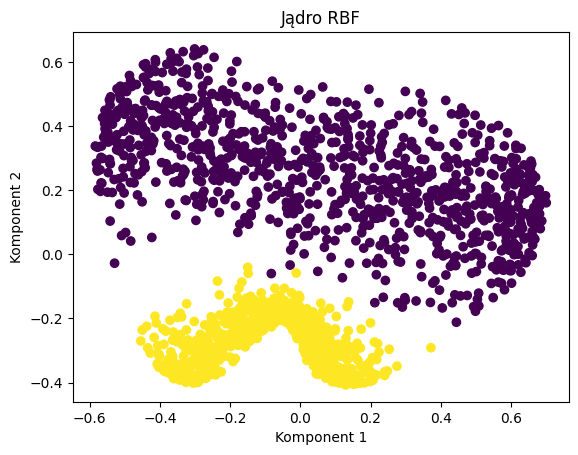

In [ ]:
x = np.vstack([inner_sphere, outer_sphere])

rbf_kernel = KernelPCA(kernel='rbf', gamma=5, degree=5, n_components=2)
x_pca = rbf_kernel.fit_transform(x)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=np.concatenate([np.zeros(num_samples), np.ones(num_samples)]))
plt.title("Jądro RBF")
plt.xlabel("Komponent 1")
plt.ylabel("Komponent 2")
plt.show()

**Jądro wielomianowe**

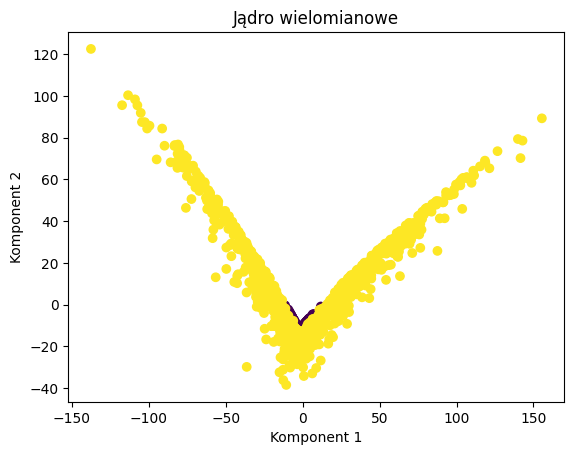

In [ ]:
rbf_kernel = KernelPCA(kernel='poly', gamma=5, degree=5, n_components=2)
x_pca = rbf_kernel.fit_transform(x)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=np.concatenate([np.zeros(num_samples), np.ones(num_samples)]))
plt.title("Jądro wielomianowe")
plt.xlabel("Komponent 1")
plt.ylabel("Komponent 2")
plt.show()

**Porównanie ze wcześniej użytym jądrem liniowym.**

Przypomnijmy wyniki modeli MLP i SVC uzyskane w poprzednim zadaniu, podczas treningu przy użyciu PCA z jądrem liniowym:

Kolejno: Precision, Recall, F1-Score i Support.

MLP 100 komponenentów:

         accuracy                           0.76       468
        macro avg       0.73      0.66      0.69       468
     weighted avg       0.76      0.76      0.75       468

MLP 50 komponentów:

         accuracy                           0.74       468
        macro avg       0.69      0.65      0.66       468
     weighted avg       0.74      0.74      0.74       468


SVC 100 komponentów:

         accuracy                           0.69       468
        macro avg       0.82      0.52      0.59       468
     weighted avg       0.74      0.69      0.66       
     

SVC 50 komponentów:

         accuracy                           0.66       468
        macro avg       0.79      0.50      0.57       468
     weighted avg       0.71      0.66      0.63       468



Przygotowanie jądra RGF do treningu

In [2]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=50)

X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Przygotowanie jąder RGF

In [21]:
rbf_kernel = KernelPCA(kernel='rbf', gamma=5, degree=5, n_components=2)
x_pca_rbf = rbf_kernel.fit_transform(X_train)

pca_rbf_100 = KernelPCA(kernel='rbf', n_components=100)
X_train_pca_100 = pca_rbf_100.fit_transform(X_train)
X_test_pca_100 = pca_rbf_100.transform(X_test)

pca_rbf_50 = KernelPCA(kernel='rbf', n_components=50)
X_train_pca_50 = pca_rbf_50.fit_transform(X_train)
X_test_pca_50 = pca_rbf_50.transform(X_test)

Trening MLP przy użyciu PCA z jądrem RGF

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_pca_100 , y_train)
y_pred = clf.predict(X_test_pca_100)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print("MLP dla jądra RGF i 100 komponenetów \n \n", report)

MLP dla jądra RGF i 100 komponenetów 
 
                    precision    recall  f1-score   support

     Ariel Sharon       0.70      0.74      0.72        19
     Colin Powell       0.84      0.83      0.84        65
  Donald Rumsfeld       0.72      0.59      0.65        39
    George W Bush       0.75      0.93      0.83       151
Gerhard Schroeder       0.71      0.83      0.76        29
      Hugo Chavez       0.73      0.50      0.59        16
   Jacques Chirac       0.67      0.40      0.50        15
    Jean Chretien       0.79      0.58      0.67        19
    John Ashcroft       1.00      0.53      0.69        19
Junichiro Koizumi       0.74      0.78      0.76        18
  Serena Williams       0.90      0.78      0.84        23
       Tony Blair       0.78      0.69      0.73        55

         accuracy                           0.77       468
        macro avg       0.78      0.68      0.71       468
     weighted avg       0.77      0.77      0.76       468



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Średnie wyniki są tutaj trochę lepsze niż w przypadku treningu z użyciem zwykłego PCA.

In [23]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_pca_50 , y_train)
y_pred = clf.predict(X_test_pca_50)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print("MLP dla jądra RGF i 50 komponenetów", report)

MLP dla jądra RGF i 50 komponenetów                    precision    recall  f1-score   support

     Ariel Sharon       0.65      0.89      0.76        19
     Colin Powell       0.76      0.77      0.76        65
  Donald Rumsfeld       0.77      0.51      0.62        39
    George W Bush       0.81      0.91      0.85       151
Gerhard Schroeder       0.56      0.66      0.60        29
      Hugo Chavez       0.71      0.62      0.67        16
   Jacques Chirac       0.46      0.40      0.43        15
    Jean Chretien       0.85      0.58      0.69        19
    John Ashcroft       0.71      0.53      0.61        19
Junichiro Koizumi       0.93      0.72      0.81        18
  Serena Williams       0.83      0.83      0.83        23
       Tony Blair       0.65      0.65      0.65        55

         accuracy                           0.74       468
        macro avg       0.72      0.67      0.69       468
     weighted avg       0.75      0.74      0.74       468



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Średnie wyniki są tutaj trochę lepsze niż w przypadku treningu z użyciem zwykłego PCA.

Trening SVC przy użyciu PCA z jądrem RGF

In [24]:
from sklearn.svm  import SVC

svc = SVC(random_state=42)
svc.fit(X_train_pca_100, y_train)
y_pred = svc.predict(X_test_pca_100)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print("SVC dla jądra RGF i 100 komponentów", report)

SVC dla jądra RGF i 100 komponentów                    precision    recall  f1-score   support

     Ariel Sharon       0.70      0.37      0.48        19
     Colin Powell       0.68      0.80      0.74        65
  Donald Rumsfeld       0.74      0.44      0.55        39
    George W Bush       0.60      0.95      0.73       151
Gerhard Schroeder       0.75      0.52      0.61        29
      Hugo Chavez       0.75      0.38      0.50        16
   Jacques Chirac       1.00      0.13      0.24        15
    Jean Chretien       0.80      0.42      0.55        19
    John Ashcroft       0.00      0.00      0.00        19
Junichiro Koizumi       0.80      0.44      0.57        18
  Serena Williams       0.83      0.83      0.83        23
       Tony Blair       0.70      0.60      0.65        55

         accuracy                           0.66       468
        macro avg       0.70      0.49      0.54       468
     weighted avg       0.67      0.66      0.63       468



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Średnie wyniki są tutaj słabsze niż w przypadku treningu z użyciem zwykłego PCA.

In [25]:
svc = SVC(random_state=42)
svc.fit(X_train_pca_50, y_train)
y_pred = svc.predict(X_test_pca_50)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print("SVC dla jądra RGF i 50 komponentów", report)

SVC dla jądra RGF i 50 komponentów                    precision    recall  f1-score   support

     Ariel Sharon       0.67      0.21      0.32        19
     Colin Powell       0.61      0.78      0.69        65
  Donald Rumsfeld       0.75      0.38      0.51        39
    George W Bush       0.56      0.95      0.71       151
Gerhard Schroeder       0.62      0.34      0.44        29
      Hugo Chavez       0.83      0.31      0.45        16
   Jacques Chirac       1.00      0.07      0.12        15
    Jean Chretien       0.75      0.32      0.44        19
    John Ashcroft       0.00      0.00      0.00        19
Junichiro Koizumi       0.89      0.44      0.59        18
  Serena Williams       0.82      0.78      0.80        23
       Tony Blair       0.72      0.53      0.61        55

         accuracy                           0.62       468
        macro avg       0.69      0.43      0.47       468
     weighted avg       0.65      0.62      0.58       468



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Średnie wyniki są tutaj słabsze niż w przypadku treningu z użyciem zwykłego PCA.

Przygotowanie jąder wielomianowych

In [26]:
poly_kernel = KernelPCA(kernel='poly', gamma=5, degree=5, n_components=2)
x_pca_poly = poly_kernel.fit_transform(X_train)

pca_poly_100 = KernelPCA(kernel='poly', n_components=100)
X_train_pca_100 = pca_poly_100.fit_transform(X_train)
X_test_pca_100 = pca_poly_100.transform(X_test)

pca_rbf_50 = KernelPCA(kernel='poly', n_components=50)
X_train_pca_50 = pca_rbf_50.fit_transform(X_train)
X_test_pca_50 = pca_rbf_50.transform(X_test)

**Trening MLP przy użyciu PCA z jądrem wielomianowym**

In [27]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_pca_100 , y_train)
y_pred = clf.predict(X_test_pca_100)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print("MLP dla jądra wielomianowego i 100 komponenetów \n \n", report)

MLP dla jądra wielomianowego i 100 komponenetów 
 
                    precision    recall  f1-score   support

     Ariel Sharon       0.70      0.74      0.72        19
     Colin Powell       0.82      0.82      0.82        65
  Donald Rumsfeld       0.71      0.64      0.68        39
    George W Bush       0.85      0.90      0.87       151
Gerhard Schroeder       0.77      0.69      0.73        29
      Hugo Chavez       0.64      0.56      0.60        16
   Jacques Chirac       0.67      0.40      0.50        15
    Jean Chretien       0.63      0.63      0.63        19
    John Ashcroft       0.60      0.47      0.53        19
Junichiro Koizumi       0.68      0.72      0.70        18
  Serena Williams       0.89      0.74      0.81        23
       Tony Blair       0.67      0.82      0.74        55

         accuracy                           0.77       468
        macro avg       0.72      0.68      0.69       468
     weighted avg       0.77      0.77      0.76       468



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Średnie wyniki trochę lepsze, niż dla zwykłego PCA.

In [29]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_pca_50 , y_train)
y_pred = clf.predict(X_test_pca_50)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print("MLP dla jądra RGF i 50 komponenetów \n \n", report)

MLP dla jądra RGF i 50 komponenetów 
 
                    precision    recall  f1-score   support

     Ariel Sharon       0.73      0.58      0.65        19
     Colin Powell       0.66      0.82      0.73        65
  Donald Rumsfeld       0.72      0.54      0.62        39
    George W Bush       0.74      0.83      0.79       151
Gerhard Schroeder       0.44      0.59      0.50        29
      Hugo Chavez       0.47      0.44      0.45        16
   Jacques Chirac       0.38      0.20      0.26        15
    Jean Chretien       0.67      0.63      0.65        19
    John Ashcroft       0.54      0.37      0.44        19
Junichiro Koizumi       0.75      0.67      0.71        18
  Serena Williams       0.91      0.87      0.89        23
       Tony Blair       0.63      0.49      0.55        55

         accuracy                           0.68       468
        macro avg       0.64      0.58      0.60       468
     weighted avg       0.67      0.68      0.67       468



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Średnie wyniki słabsze, niż dla zwykłego PCa.

**Trening SVC przy użyciu PCA z jądrem wielomianowym**

In [31]:
svc = SVC(random_state=42)
svc.fit(X_train_pca_100, y_train)
y_pred = svc.predict(X_test_pca_100)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print("SVC dla jądra wielomianowego i 100 komponentów", report)

SVC dla jądra wielomianowego i 100 komponentów                    precision    recall  f1-score   support

     Ariel Sharon       1.00      0.05      0.10        19
     Colin Powell       0.56      0.82      0.67        65
  Donald Rumsfeld       0.79      0.38      0.52        39
    George W Bush       0.49      0.95      0.65       151
Gerhard Schroeder       0.54      0.24      0.33        29
      Hugo Chavez       1.00      0.06      0.12        16
   Jacques Chirac       0.00      0.00      0.00        15
    Jean Chretien       0.80      0.42      0.55        19
    John Ashcroft       0.00      0.00      0.00        19
Junichiro Koizumi       0.75      0.17      0.27        18
  Serena Williams       1.00      0.39      0.56        23
       Tony Blair       0.73      0.35      0.47        55

         accuracy                           0.56       468
        macro avg       0.64      0.32      0.35       468
     weighted avg       0.61      0.56      0.49       468



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Średnie wyniki słabsze, niż dla zwykłego PCA

In [32]:
svc = SVC(random_state=42)
svc.fit(X_train_pca_50, y_train)
y_pred = svc.predict(X_test_pca_50)

report = classification_report(y_test, y_pred, target_names=lfw_people.target_names)
print("SVC dla jądra wielomianowego i 50 komponentów", report)

SVC dla jądra wielomianowego i 50 komponentów                    precision    recall  f1-score   support

     Ariel Sharon       1.00      0.05      0.10        19
     Colin Powell       0.54      0.63      0.58        65
  Donald Rumsfeld       0.76      0.33      0.46        39
    George W Bush       0.44      0.94      0.60       151
Gerhard Schroeder       0.67      0.07      0.12        29
      Hugo Chavez       0.00      0.00      0.00        16
   Jacques Chirac       0.00      0.00      0.00        15
    Jean Chretien       0.67      0.32      0.43        19
    John Ashcroft       0.00      0.00      0.00        19
Junichiro Koizumi       0.75      0.17      0.27        18
  Serena Williams       0.85      0.48      0.61        23
       Tony Blair       0.68      0.24      0.35        55

         accuracy                           0.50       468
        macro avg       0.53      0.27      0.29       468
     weighted avg       0.54      0.50      0.42       468



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Średnie wyniki słabsze, niż dla zwykłego PCA

**Podsumowanie**

Średnie wyniki dla treningu z wykorzystaniem PCA o jądrze wielomianowym lub RGF są do siebie zbliżone i lepsze od standardowego jądra liniowego dla MLP, ale słabsze dla SVC.